In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('clean_resume_data.csv')

In [3]:
df.head()

,ID,Category,Feature
0,16852973,HR,hr administrator marketing associate hr admini...
1,22323967,HR,hr specialist hr operations summary media prof...
2,33176873,HR,hr director summary years experience recruitin...
3,27018550,HR,hr specialist summary dedicated driven dynamic...
4,17812897,HR,hr manager skill highlights hr skills hr depar...


In [4]:
df['Category'].value_counts()

Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64

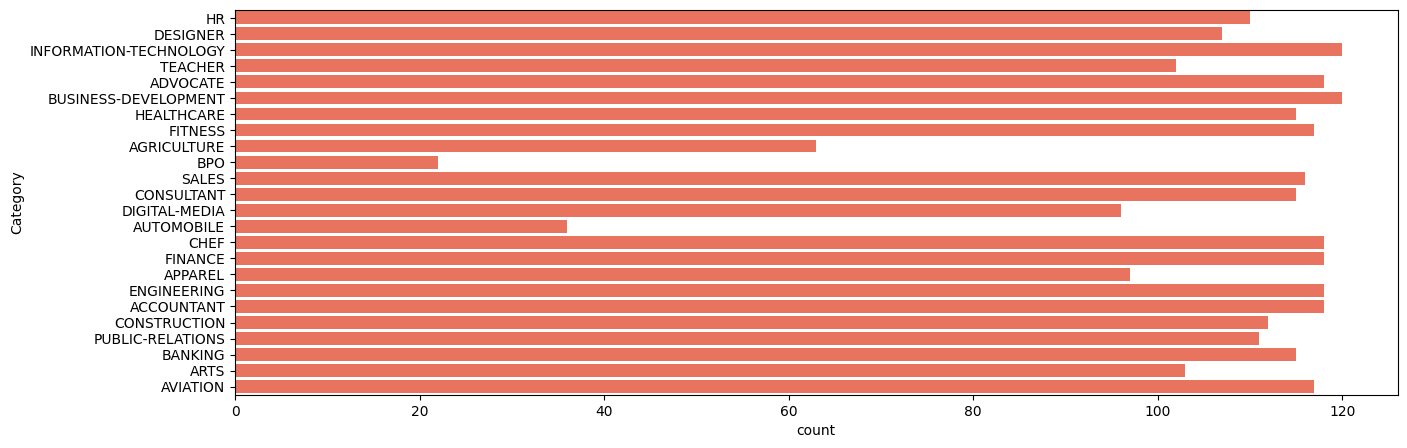

In [5]:
plt.figure(figsize= (15, 5))
sns.countplot(df['Category'], color="#FF6347")
plt.show()

In [6]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()

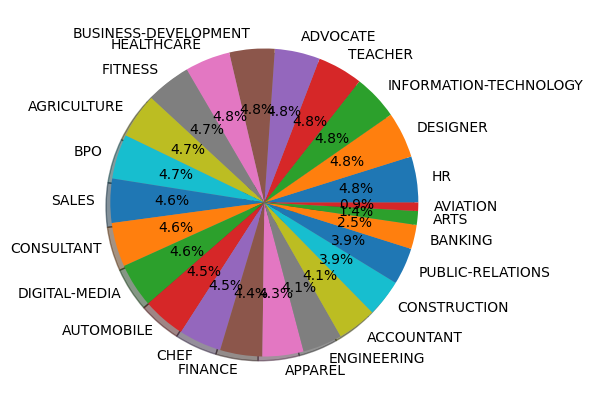

In [7]:
plt.figure(figsize= (15, 5))
plt.pie(counts, labels= labels, autopct='%1.1f%%', shadow= True)
plt.show()

In [8]:
from sklearn.utils import resample

max_count = df['Category'].value_counts().max()
balanced_data = []
for category in df['Category'].unique():
    category_data = df[df['Category'] == category]
    if len(category_data) < max_count:
        balanced_category_data = resample(category_data, replace= True, n_samples= max_count, random_state= 42)
    else:
        balanced_category_data = resample(category_data, replace= False, n_samples= max_count, random_state= 42)
    balanced_data.append(balanced_category_data)
    balanced_df = pd.concat(balanced_data)    

In [9]:
balanced_df['Category'].value_counts()
df = balanced_df

In [10]:
df.isnull().sum()

ID          0
Category    0
Feature     1
dtype: int64

In [11]:
df.dropna(inplace= True)

In [12]:
from sklearn.model_selection import train_test_split
X = df['Feature']
y = df['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [13]:
print(X_train.shape, X_test.shape)

(2303,) (576,)


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf_X_train = tfidf.fit_transform(X_train)
tfidf_X_test = tfidf.transform(X_test)

In [15]:
print(tfidf_X_test)

  (0, 29678)	0.058372547840923
  (0, 29635)	0.027486664103746648
  (0, 29632)	0.030145869232033436
  (0, 29442)	0.0860279990423501
  (0, 29402)	0.028479261124386323
  (0, 29195)	0.06335579656963128
  (0, 28950)	0.0921844219855474
  (0, 28614)	0.06876240504285053
  (0, 28607)	0.023560028080139808
  (0, 28590)	0.08342076543887733
  (0, 28449)	0.04800404610596008
  (0, 28276)	0.03494656007635794
  (0, 28270)	0.013889477294196014
  (0, 28158)	0.023292609714201506
  (0, 28116)	0.013897390103515723
  (0, 28052)	0.03659107513635957
  (0, 27917)	0.009715590477368795
  (0, 27909)	0.04105101254561208
  (0, 27807)	0.04896608800118829
  (0, 27600)	0.05799175931933246
  (0, 27570)	0.0674633976633174
  (0, 27475)	0.05507054047044243
  (0, 27276)	0.028990661574443546
  (0, 27206)	0.009890500950423238
  (0, 27202)	0.05367612119334299
  :	:
  (575, 2505)	0.01860126622806003
  (575, 2367)	0.05573943138001846
  (575, 2347)	0.0522017241004347
  (575, 2342)	0.10916659372923743
  (575, 2191)	0.0334787328752

In [16]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(tfidf_X_train, y_train)
y_pred = clf.predict(tfidf_X_test)

In [17]:
print(y_pred)

['TEACHER' 'DIGITAL-MEDIA' 'CONSTRUCTION' 'AUTOMOBILE' 'BPO' 'SALES' 'BPO'
 'ACCOUNTANT' 'FITNESS' 'FINANCE' 'AVIATION' 'ARTS' 'TEACHER' 'CHEF'
 'TEACHER' 'TEACHER' 'HR' 'DESIGNER' 'INFORMATION-TECHNOLOGY' 'HEALTHCARE'
 'FITNESS' 'SALES' 'SALES' 'CONSTRUCTION' 'CHEF' 'DIGITAL-MEDIA' 'APPAREL'
 'AGRICULTURE' 'CHEF' 'FINANCE' 'BUSINESS-DEVELOPMENT' 'AUTOMOBILE'
 'CONSTRUCTION' 'BANKING' 'APPAREL' 'FITNESS' 'CONSTRUCTION' 'AVIATION'
 'ACCOUNTANT' 'AVIATION' 'ARTS' 'DIGITAL-MEDIA' 'CONSULTANT'
 'CONSTRUCTION' 'FITNESS' 'SALES' 'ACCOUNTANT' 'INFORMATION-TECHNOLOGY'
 'ARTS' 'SALES' 'ACCOUNTANT' 'AVIATION' 'AUTOMOBILE' 'ARTS' 'AVIATION'
 'FITNESS' 'ADVOCATE' 'PUBLIC-RELATIONS' 'HR' 'AGRICULTURE' 'TEACHER'
 'BUSINESS-DEVELOPMENT' 'CONSULTANT' 'HEALTHCARE' 'HEALTHCARE' 'DESIGNER'
 'ACCOUNTANT' 'PUBLIC-RELATIONS' 'FINANCE' 'AVIATION' 'HEALTHCARE'
 'DESIGNER' 'ENGINEERING' 'AVIATION' 'CHEF' 'INFORMATION-TECHNOLOGY'
 'ENGINEERING' 'CHEF' 'INFORMATION-TECHNOLOGY' 'TEACHER' 'AVIATION'
 'ENGINEERING'

In [18]:
from sklearn.metrics import accuracy_score
print("Model accuracy score is :", accuracy_score(y_test, y_pred))

Model accuracy score is : 0.8385416666666666


In [19]:
from sklearn.metrics import classification_report
print("Classification report is :", classification_report(y_test, y_pred))

Classification report is :                         precision    recall  f1-score   support

            ACCOUNTANT       0.78      1.00      0.88        21
              ADVOCATE       0.95      0.69      0.80        29
           AGRICULTURE       0.94      0.74      0.83        23
               APPAREL       0.89      0.81      0.85        21
                  ARTS       1.00      0.59      0.74        22
            AUTOMOBILE       1.00      1.00      1.00        19
              AVIATION       0.88      0.97      0.92        30
               BANKING       0.94      0.74      0.83        23
                   BPO       1.00      1.00      1.00        15
  BUSINESS-DEVELOPMENT       0.42      0.56      0.48        18
                  CHEF       0.87      0.96      0.92        28
          CONSTRUCTION       0.93      1.00      0.96        25
            CONSULTANT       0.86      0.61      0.72        31
              DESIGNER       0.96      0.86      0.91        28
         DIG

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion metrics is :\n", cm)

Confusion metrics is :
 [[21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 20  0  1  0  0  0  0  0  0  2  0  0  0  0  0  0  0  1  3  1  0  0  1]
 [ 0  1 17  0  0  0  0  0  0  0  0  0  1  0  0  2  0  0  1  0  0  0  0  1]
 [ 0  0  0 17  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  1  0  0  2  0]
 [ 0  0  0  0 13  0  1  0  0  0  1  0  0  0  1  0  0  2  0  0  1  0  0  3]
 [ 0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 29  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0 17  0  1  0  0  0  0  0  0  2  1  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0 10  0  0  1  0  3  0  0  0  0  2  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1 27  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  2  0  1 19  0  0  1  0  1  0  3  1  2  0  0]
 

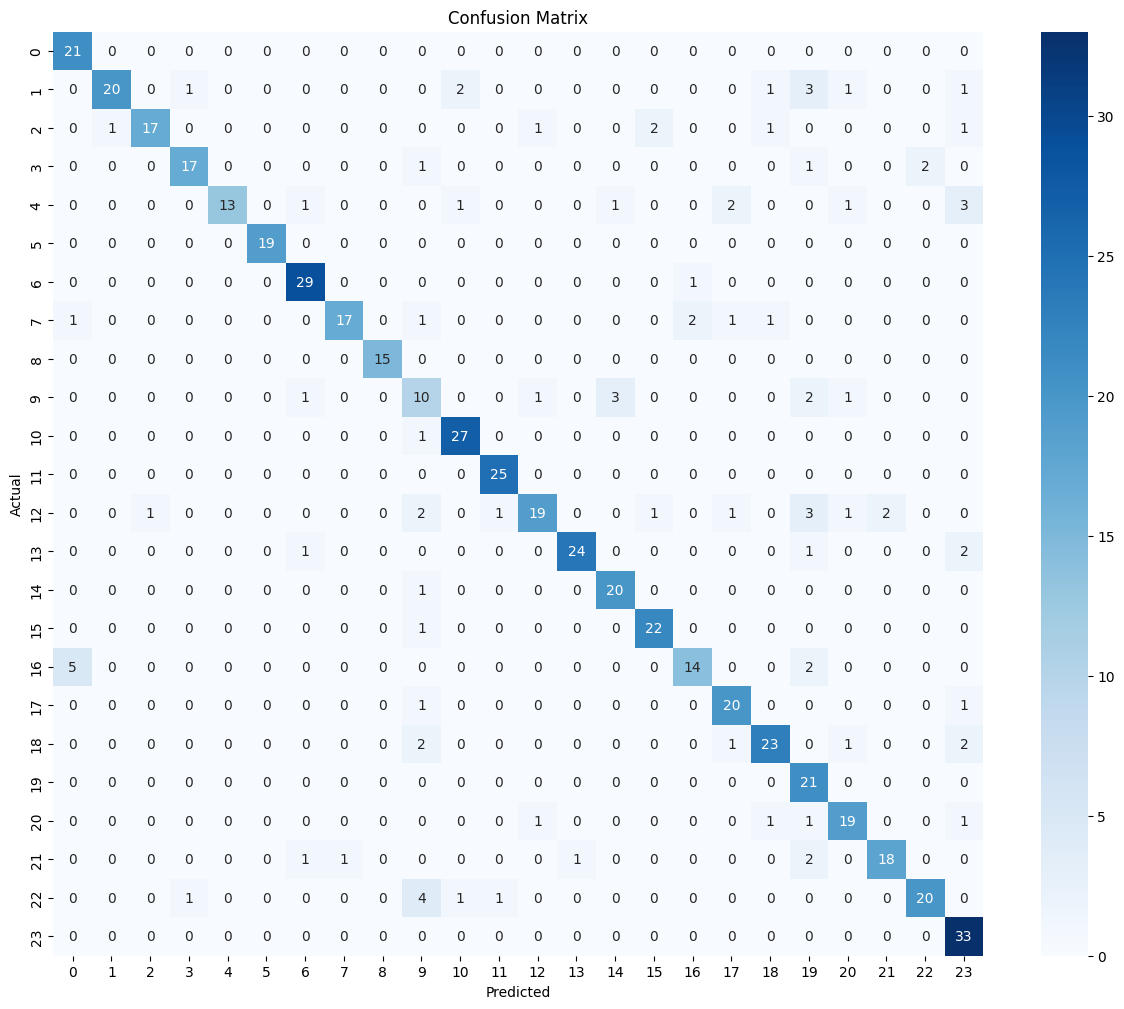

In [21]:
plt.figure(figsize=(15, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [22]:
import re

def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remove email addresses
    text = re.sub(r'\S+@\S+', '', text)
    
    # Remove special characters (keeping only alphanumeric and spaces text)
    text = re.sub(r'[^A-Za-z0-9 ]+', '', text)
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

In [23]:
def predict_category(myresume):
    resume_text = clean_text(myresume)
    resume_tfidf = tfidf.transform([resume_text])
    predicted_category = clf.predict(resume_tfidf)[0]
    return predicted_category

In [24]:
# Testing
myresume = """
BARI ANKIT VINOD
github.com/OnlyCR7 | linkedin.com/in/mycr7/ | vbari8527@gmail.com | +91-7875618947
Portfolio Website : https://onlycr7.github.io/DataSci_Labs_Portfolio/
Skills
Languages: C/C++, Java, JavaScript, SQL, Python
Technologies & Tools: DBMS, Tableau, PowerBI, Docker, ML & DL, NLP, Visualization, Computer Vision, TensorFlow,
PyTorch, LLM
Education 
Theem College of Engg. 2021 - 2022 - 2023
Diploma in Computer Science and Engineering Percentage: 85%
Relevant Coursework: Object Oriented Programming, Databases, Data Structures and Algorithms, Operating Systems, Computer 
Networks, Computer Graphics
Vidyavardhini's College of Engg. And Tech. 2023 - Now
B.E. in Artificial Intelligence and Data Science
Relevant Coursework: Object Oriented Programming, Databases, Discrete Maths, Applied Maths, Data Structures and Analysis 
of Algorithms, Operating Systems, Computer Networks, Machine Learning, Data Mining, Advance Data Structures and 
Algorithms, Information Retrieval, Image Processing, NLP
Project Work 
• Land Area Calculation using ML (2022): Developed a desktop software for calculating the land area in map. Implemented 
efficient to use for the user. Used openstreet map API to get the online map. Python, OpenStreetMap. 
• Smart Parking System using CV (2023): Applied computer vision concepts to find the correct parking space for the car. 
Implemented front-end to book a slot for the car to park and integrate system with back-end. Used cv2 library for recognition. 
Python, CV2.
• Smart Driving System using NLP (2024): Used the computer vision to detect the path holes and using NLP concepts 
implemented the correct path to drive the car. Python, CV2, NLP.
Certificates
• Internship in Data Science: Successfully completed the training and internship in domain of Data Science by 
Acmegrade.
"""

In [25]:
predicted_category = predict_category(myresume)
print("Your resume category is:", predicted_category)

Your resume category is: ENGINEERING


In [26]:
import pickle as pkl
pkl.dump(tfidf, open('tfidf.pkl', 'wb'))
pkl.dump(clf, open('clf.pkl', 'wb'))